In [1]:
import numpy as np
import sys
import dimod
import matplotlib.pyplot as plt
import os
import re
import neal
import math

from dwave.system import EmbeddingComposite, DWaveSampler
from dwave_qbsolv import QBSolv
from pyqubo import Spin, Array
from embedding_generator import generate_embedding

In [2]:
num_reads = 100
num_events = 1000
num_iter = 40

path = '/Users/1zd/quantumjets/pythiaEvents/'

theta = np.pi/2.

sampler = EmbeddingComposite(DWaveSampler(solver='Advantage_system1.1'))
sa_sampler = neal.SimulatedAnnealingSampler()

ant = np.linspace(1, 2000, 20)

In [16]:
sampler.properties

337669, 0.5384207085236765],
   [-0.6360475121844884, 0.4781610469146876],
   [-0.5039387808222354, 0.6035599622557141],
   [-0.5255410144126154, 0.6034866304923915],
   [-0.5555735484985672, 0.6127687080199186],
   [-0.5223696117602638, 0.6124094564847246],
   [-0.5053732585919076, 0.6141358032601784],
   [-0.5932983392749898, 0.6228545132772145],
   [-0.5842781260438037, 0.621174397404212],
   [-0.5996913754052786, 0.6365770520251015],
   [-0.5832925977987913, 0.620666749708555],
   [-0.5857384899184841, 0.6254460311593337],
   [-0.6206897609134167, 0.613402096889544],
   [-0.6278795512914717, 0.5852912285273747],
   [-0.6215451914306256, 0.5693376274970602],
   [-0.6181755155036478, 0.5017647707196216],
   [0.0, 0.0],
   [-0.5218445358688023, 0.6150550401879744],
   [-0.5470490583961476, 0.6246939350925896],
   [-0.5088474601526918, 0.6272238476551594],
   [-0.5013781087216621, 0.627415876525086],
   [-0.5402113859379201, 0.6250410518432686],
   [-0.5302344082276891, 0.6248529005855

In [3]:
ant

array([1.00000000e+00, 1.06210526e+02, 2.11421053e+02, 3.16631579e+02,
       4.21842105e+02, 5.27052632e+02, 6.32263158e+02, 7.37473684e+02,
       8.42684211e+02, 9.47894737e+02, 1.05310526e+03, 1.15831579e+03,
       1.26352632e+03, 1.36873684e+03, 1.47394737e+03, 1.57915789e+03,
       1.68436842e+03, 1.78957895e+03, 1.89478947e+03, 2.00000000e+03])

In [4]:
def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n

In [12]:

for ev in range(4,5):
    print('Event Number %s' %ev)
    print(ev)

    #with open(fout_name, 'w') as fout:

    fname = path + 'Event_' + str(ev) + '.dat'
    f = open(fname)

    pat = re.compile(r"\s+")

    g = list(zip(*[ pat.sub(" ",x.strip()).split() for x in f]))

    px = np.array([ float(x) for x in g[0]])
    py = np.array([ float(x) for x in g[1]])
    pz = np.array([ float(x) for x in g[2]])
    e = np.array([ float(x) for x in g[3]])

        # Generate qubo

    n_part = len(px)
    print('Number of particles: %s' %n_part)
    s = Array.create('s', shape=n_part, vartype='BINARY')

        # Create an array of zeroes for qubo matrix coefficients
    coeff = [[0] * n_part for _ in range(n_part)] 

    for i in range(0,n_part):
        for j in range(0,n_part):
            coeff[i][j] = (px[i]*px[j] +py[i]*py[j] + pz[i]*pz[j] - e[i]*e[j] * np.cos(theta))/(1 - np.cos(theta))

        # Construct Hamiltonian
    H = sum([ -1.0*coeff[i][j]*s[i]*s[j] for i in range(0,n_part) for j in range(0,n_part)])

        # Compile model using pyqubo

    model = H.compile()
    qubo, offset = model.to_qubo()

    sum_mom = sum([np.sqrt(px[i]*px[i] + py[i]*py[i]+ pz[i]*pz[i])  for i in range(0,n_part)])

        # Submit problem to D-Wave
    yvals = {}
    for r in ant:
        y_list = []
        counter = 0
        ch_str = qubo[max(qubo, key=qubo.get)]*0.25
        print('Annealing time: %s' %r)
        for i in range(num_iter):
            response = sampler.sample_qubo(qubo, num_reads = 1000, chain_strength=ch_str, annealing_time=r)
                #response.first.energy
            dthrust = 2.*np.sqrt(-1.*response.first.energy)/sum_mom
            print(truncate(dthrust,6))
            y_list.append(truncate(dthrust,6))
            if(truncate(dthrust,6) == 0.980208): 
                counter += 1
        yvals[r] = y_list
        print(counter)

        #fout.write("%s  %s  %s \n" %(thrust,thrust_sa,rev))
    


Event Number 4
4
Number of particles: 45
Annealing time: 1.0
0.947907
0.947718
0.947723
0.947907
0.948844
0.947738
0.948674
0.947566
0.948674
0.947907
0.945851
0.947876
0.946986
0.947718
0.947907
0.947738
0.947718
0.947738
0.946986
0.947876
0.947907
0.947154
0.948674
0.945111
0.947738
0.948674
0.947738
0.946941
0.947566
0.945888
0.947738
0.946941
0.946784
0.947907
0.94605
0.94573
0.948844
0.946986
0.947876
0.947738
0
Annealing time: 106.21052631578948
0.948844
0.947876
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.948674
0.948674
0.948844
0.947718
0.948844
0.947876
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.947907
0.948844
0.948844
0.948674
0.948844
0.948844
0.948844
0.948844
0.948844
0.947907
0.948844
0.948844
0.948844
0.948844
0.948674
0.948844
0.948844
0.948844
0
Annealing time: 211.42105263157896
0.948844
0.948844
0.948674
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.948844
0.9

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
import seaborn as sns

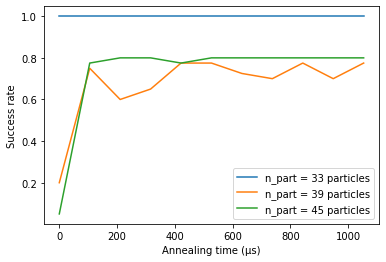

In [25]:
x = [1.0, 106.21052631578948, 211.42105263157896, 316.63157894736844,421.8421052631579,  527.0526315789474, 632.2631578947369, 737.4736842105264, 842.6842105263158, 947.8947368421053, 1053.1052]
y_32 = [0.2,   0.75,  0.6,  0.65,  0.775,   0.775,   0.725,  0.7,  0.775,  0.7, 0.775]
y_1 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_12 = [0.05, 0.775, 0.8, 0.8, 0.775, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
sns.lineplot(x, y_1, label = 'n_part = 33 particles')
sns.lineplot(x, y_32, label = 'n_part = 39 particles')
sns.lineplot(x, y_12, label = 'n_part = 45 particles')

plt.xlabel('Annealing time (\u03bcs)')
plt.ylabel('Success rate')
#plt.xscale('log')

plt.savefig("plots/anneal_scan.png")